In [24]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

FOCUS_GENES = ('SCN1A','SCN2A','KCNQ2', 'KCNQ3', 'CDKL5',
               'PCDH19', 'SCN1B', 'SCN8A', 'SLC2A1',
               'SPTAN1', 'STXBP1', 'TSC1')

def mk_class(row):
    if row['Classification'] in ('Benign', 'BENIGN', 'LIKELY BENIGN'):
        return 'B'
    elif row['Classification'] in ('PATHOGENIC', 'LIKELY PATHOGENIC', 'Reduced function allele'):
        return 'P'
    elif row['Classification'] == 'VOUS':
        return 'V'
    else:
        print(row['Classification'])
        i = 1/0
        
afile = '../data/raw/UC_all_panel_variants_01_20_2016.xlsx'
df = pd.read_excel(afile)
df.loc[:, 'class'] = df.apply(mk_class, axis=1)
focus = df[ df.apply(lambda row: str(row['Gene Symbol']) in FOCUS_GENES and row['Classification'] != 'VOUS', axis=1) ]
ss = focus.groupby(['Gene Symbol', 'class']).size().reset_index().rename(columns={0:'size'})

In [26]:
ss.head()

,Gene Symbol,class,size
0,CDKL5,B,12
1,CDKL5,P,5
2,KCNQ2,B,14
3,KCNQ2,P,6
4,KCNQ3,B,7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

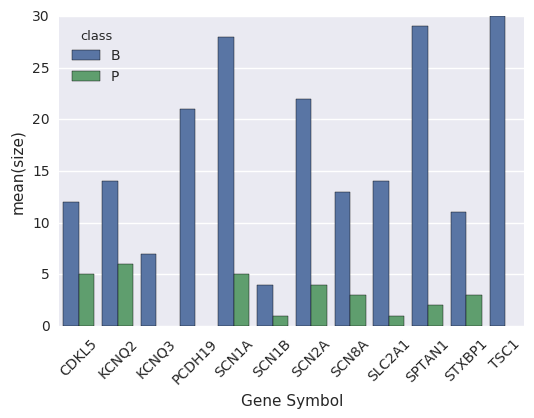

In [25]:
sns.barplot(x='Gene Symbol', y='size', hue='class', data=ss)
plt.xticks(rotation=45)

In [33]:
df[df['Gene Symbol']=='SCN1A'][['Pos', 'Ref', 'Alt', 'Gene', 'Gene Symbol', 'Transcript',
                                'Pos Fam Cnt', 'Neg Fam Cnt', 'class']]

,Pos,Ref,Alt,Gene,Gene Symbol,Transcript,Pos Fam Cnt,Neg Fam Cnt,class
9725,c.1028+21,T,C,intron7,SCN1A,NM_001165963.1,78,196,B
9726,c.1212,A,G,exon9,SCN1A,NM_001165963.1,240,34,B
9727,c.1663-47,T,G,intron10,SCN1A,NM_001165963.1,87,187,B
9728,c.2292,T,C,exon13,SCN1A,NM_001165963.1,242,32,B
9729,c.2416-37,A,C,intron13,SCN1A,NM_001165963.1,87,187,B
9730,c.2947-41,C,T,intron15,SCN1A,NM_001165963.1,87,187,B
9731,c.3199,G,A,exon16,SCN1A,NM_001165963.1,242,32,B
9732,c.965-21,C,T,intron6,SCN1A,NM_001165963.1,86,188,B
9733,c.2589+4,-,del,NaN,SCN1A,NM_001165963.1,3,271,B
9734,c.3723,T,C,exon19,SCN1A,NM_001165963.1,6,268,B


In [31]:
df.columns.values

array(['Build', 'Chr', 'Pos', 'Ref', 'Alt', 'Gene', 'Gene Symbol',
       'Test/Indication', 'Transcript', 'Classification', 'Pos Fam Cnt',
       'Neg Fam Cnt', 'Homozygous Fam Cnt', 'Hemizygous Fam Cnt',
       'Heterozygous Fam Cnt', 'Homoplasmic Fam Cnt', 'Race White Fam Cnt',
       'Race Pacfic Island Fam Count', 'Race Hisp/Latino Fam Count',
       'Race Asian Fam Cnt', 'Race Mixed Fam Cnt',
       'Race Ashkenazi Jewish Fam Cnt', 'Race Unspecified Fam Cnt',
       'Race Black or Afr Amer Fam Cnt', 'Race AmrInd or Alaskan Fam Cnt',
       'Neg Race White Cnt', 'Neg Race Pacfic Island Count',
       'Neg Race Hisp/Latino Count', 'Neg Race Asian Cnt',
       'Neg Race Mixed Cnt', 'Neg Race Ashkenazi Jewish Cnt',
       'Neg Race Unspecified Cnt', 'Neg Race Black or Afr Amer Cnt',
       'Neg Race AmrInd or Alaskan Cnt', 'class'], dtype=object)

In [35]:
crit = df.apply(lambda row: 'dup' in row['Alt'], axis=1)
df[crit].head()

,Build,Chr,Pos,Ref,Alt,Gene,Gene Symbol,Test/Indication,Transcript,Classification,...,Neg Race White Cnt,Neg Race Pacfic Island Count,Neg Race Hisp/Latino Count,Neg Race Asian Cnt,Neg Race Mixed Cnt,Neg Race Ashkenazi Jewish Cnt,Neg Race Unspecified Cnt,Neg Race Black or Afr Amer Cnt,Neg Race AmrInd or Alaskan Cnt,class
42,GRCh37,NaN,c.4516_4536,-,dup,exon37,ABCC8,"ABCC8 sequence analysis,Familial Hyperinsuline...",NM_000352.3,LIKELY PATHOGENIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
50,GRCh37,NaN,c.-549_-547,-,dup,intron1,ABCC8,"Neonatal Diabetes/ MODY Sureselect,Neonatal D...",NM_000352.4,Benign,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
180,GRCh37,NaN,c.49_51,-,dup,exon1,AGPAT2,"Congenital generalized lipodystrophy Haloplex,...",NM_006412.3,Benign,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
215,GRCh37,NaN,c.930-10,-,dup,intron10,AKR1C2,"XY DSD SureSelect,Abnormal/ambiguous genitalia...",NM_001354.5,Benign,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
422,GRCh37,NaN,c.1577_1579,-,dup,exon8,ALMS1,"ALMS1 Haloplex,Diabetes research panel,ALMS1 S...",NM_015120.4,BENIGN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [38]:
crit = df.apply(lambda row: 'del' in row['Alt'], axis=1)
df[crit].head()

,Build,Chr,Pos,Ref,Alt,Gene,Gene Symbol,Test/Indication,Transcript,Classification,...,Neg Race White Cnt,Neg Race Pacfic Island Count,Neg Race Hisp/Latino Count,Neg Race Asian Cnt,Neg Race Mixed Cnt,Neg Race Ashkenazi Jewish Cnt,Neg Race Unspecified Cnt,Neg Race Black or Afr Amer Cnt,Neg Race AmrInd or Alaskan Cnt,class
30,GRCh37,NaN,c.1332+4,-,del,intron8,ABCC8,"ABCC8 sequence analysis,Familial Hyperinsuline...",NM_000352.3,VOUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V
31,GRCh37,NaN,c.3509,-,del,exon28,ABCC8,"ABCC8 sequence analysis,Familial Hyperinsuline...",NM_000352.3,PATHOGENIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
49,GRCh37,NaN,c.4160_4162,-,del,exon34,ABCC8,"ABCC8 sequence analysis,Familial Hyperinsuline...",NM_000352.3,PATHOGENIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
71,GRCh37,NaN,c.-215_-214,-,del,intron1,ABCC8,"Neonatal Diabetes/ MODY Sureselect,Neonatal D...",NM_000352.4,VOUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V
73,GRCh37,NaN,c.1332+4,-,del,intron8,ABCC8,"Neonatal Diabetes/ MODY Sureselect,Neonatal D...",NM_000352.4,VOUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V
